In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

In [2]:
#Import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
img_1 = cv.imread("sm.jpg")
img_2 = cv.imread("sylvanas.jpg")
img_3 = cv.imread("chips.png")
img_4 = cv.imread("Shopping.jpg")

In [4]:
def plotImages(images):
    _, ax = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
    for i in range(len(images)):
        if(i == 0):
            ax[i].axis('off')
            ax[i].imshow(images[i])
        else:
            ax[i].axis('off')
            ax[i].imshow(images[i], cmap='gray')
    plt.show()

## 1. Selecionar uma imagem da Internet de algum filme que possua um fundo uniforme (azul ou verde, por ex.) e aplicar a técnica de _chroma-keying_.

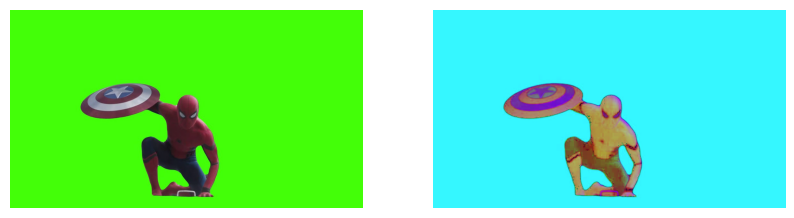

In [5]:
img_1_rgb = img_1.copy()
img_1_hsv = img_1.copy()

img_1_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_1_hsv = cv.cvtColor(img_1, cv.COLOR_BGR2HSV)

images1 = [img_1_rgb, img_1_hsv]
plotImages(images1)

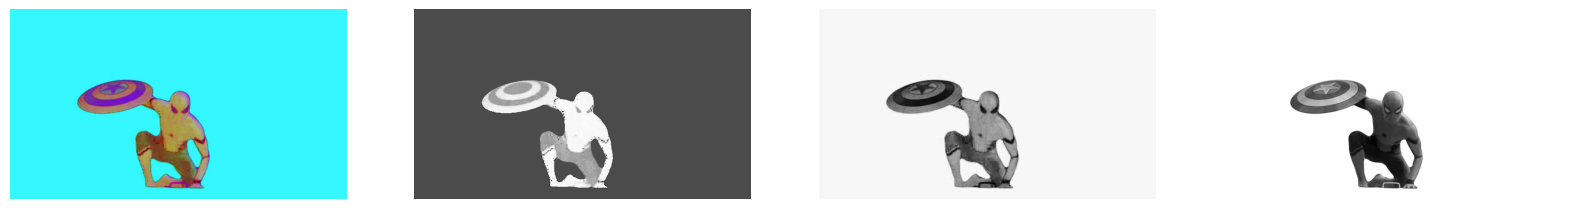

In [6]:
h,s,v = cv.split(img_1_hsv)
images2 = [img_1_hsv, h, s, v]
plotImages(images2)

In [7]:
fundo = h[0][0]
print(fundo)

53


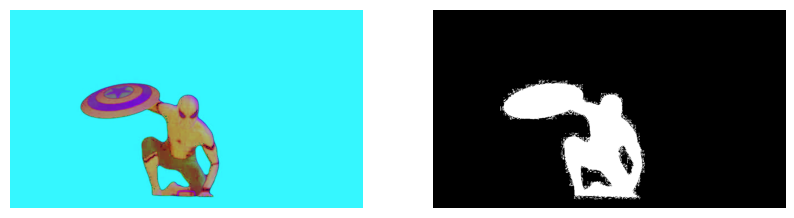

In [8]:
mask1 = 1-(h == fundo)

images3 = [img_1_hsv ,mask1]
plotImages(images3)

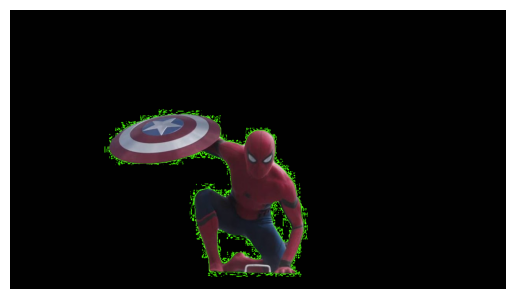

In [9]:
masked_image1 = np.copy(img_1_rgb)
masked_image1[mask1 == 0] = [1, 1, 1]
plt.axis('off')
plt.imshow(masked_image1)

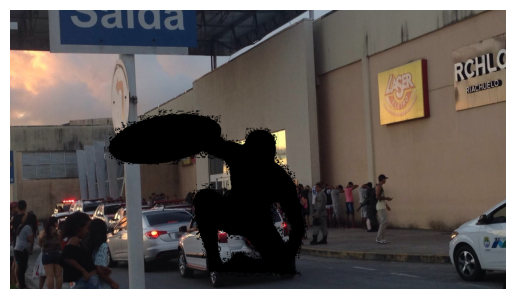

In [10]:
img_4 = cv.cvtColor(img_4,cv.COLOR_BGR2RGB)
masked_image2 = np.copy(img_4)
masked_image2[mask1 != 0] = [0, 0, 0]
plt.axis('off')
plt.imshow(masked_image2)

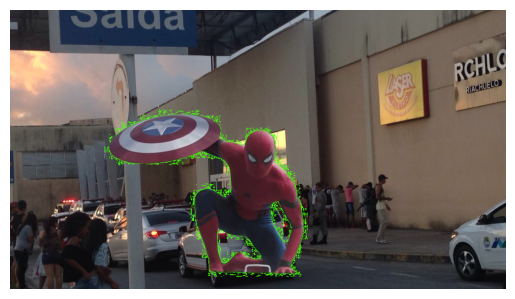

In [11]:
result = cv.bitwise_or(masked_image1,masked_image2)
plt.axis('off')
plt.imshow(result)

# 2. Carregar uma imagem RGB e aplicar um filtro de borramento.

In [12]:
kernel_borramento = np.ones((5,5),np.float32)/25

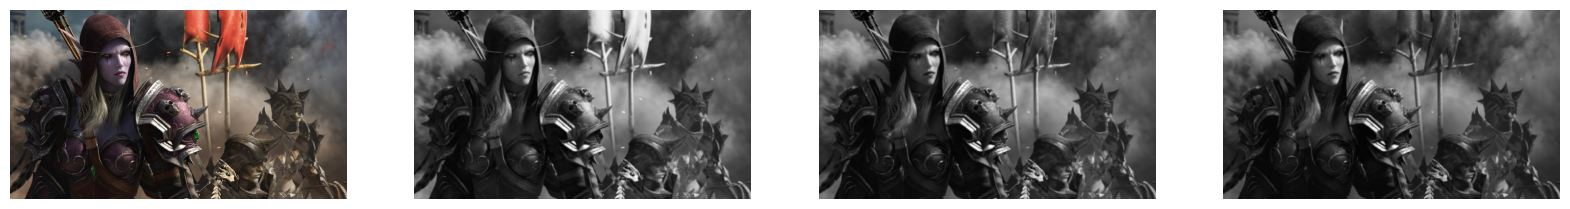

In [13]:
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
r, g, b = cv.split(img_2)

rb = cv.filter2D(r, -1, kernel_borramento)
gb = cv.filter2D(g, -1, kernel_borramento)
bb = cv.filter2D(b, -1, kernel_borramento)

images4 = [img_2, rb, gb, bb]
plotImages(images4)

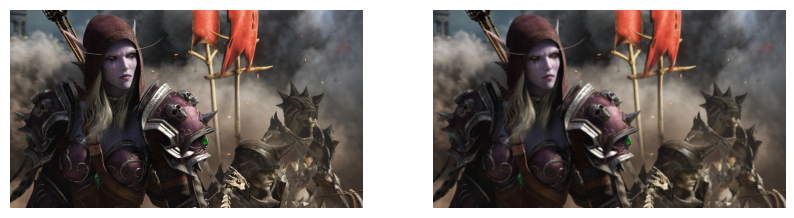

In [14]:
sylvanas_result_b =cv.merge([rb,gb,bb])
images5 = [img_2, sylvanas_result_b]
plotImages(images5)

# 3. Carregar uma imagem RGB e aplicar um filtro de realçe de bordas.

In [15]:
kernel_realce = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

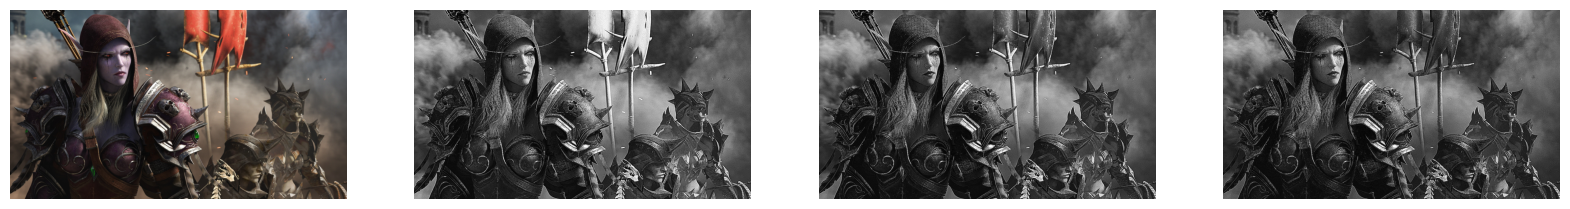

In [16]:
rr = cv.filter2D(r, -1, kernel_realce)
gr = cv.filter2D(g, -1, kernel_realce)
br = cv.filter2D(b, -1, kernel_realce)

images6 = [img_2, rr, gr, br]
plotImages(images6)

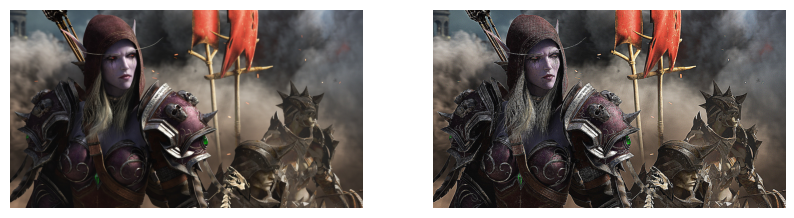

In [17]:
sylvanas_result_b =cv.merge([rr,gr,br])
images7 = [img_2, sylvanas_result_b]
plotImages(images7)

# 4. Segmentar cada um dos 5 elementos distintos da imagem 'chips.png' do diretório da disciplina.

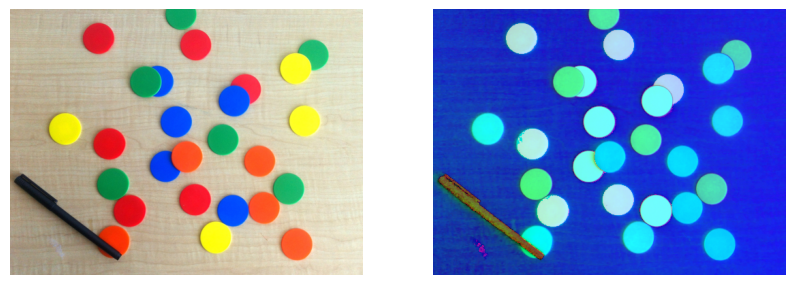

In [18]:
img_3_rgb = img_3.copy()
img_3_hsv = img_3.copy()

img_3_rgb = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_3_hsv = cv.cvtColor(img_3, cv.COLOR_BGR2HSV)

images8 = [img_3_rgb, img_3_hsv]
plotImages(images8)

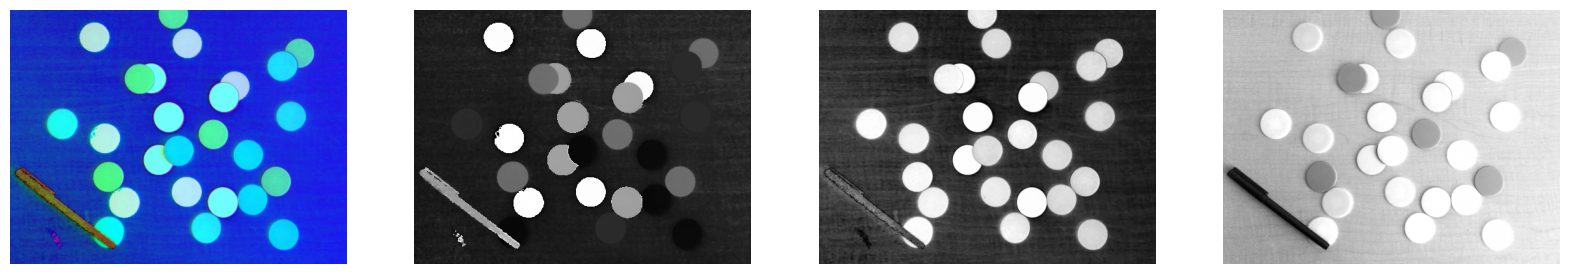

In [19]:
h,s,v = cv.split(img_3_hsv)
images9 = [img_3_hsv, h, s, v]
plotImages(images9)

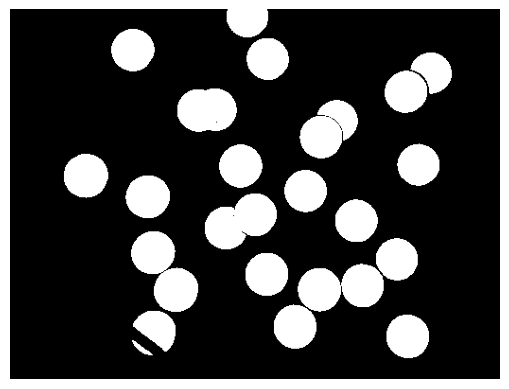

In [20]:
_, mask_chips = cv.threshold(s, 175, 255, cv.THRESH_BINARY)
plt.axis('off')
plt.imshow(mask_chips, cmap='gray')

In [21]:
#vermelho
maskR = cv.inRange(h, 175, 180); resultR = cv.bitwise_and(mask_chips, maskR); masked_imgR = np.copy(img_3_rgb); masked_imgR[resultR == 0] = [0, 0, 0]
#verde
maskG = cv.inRange(h, 70, 85);   resultG = cv.bitwise_and(mask_chips, maskG); masked_imgG = np.copy(img_3_rgb); masked_imgG[resultG == 0] = [0, 0, 0]
#Azul
maskB = cv.inRange(h, 100, 120); resultB = cv.bitwise_and(mask_chips, maskB); masked_imgB = np.copy(img_3_rgb); masked_imgB[resultB == 0] = [0, 0, 0]
#Amarelo
maskY = cv.inRange(h, 25, 35);   resultY = cv.bitwise_and(mask_chips, maskY); masked_imgY = np.copy(img_3_rgb); masked_imgY[resultY == 0] = [0, 0, 0]
#Laranja
maskO = cv.inRange(h, 3, 20);    resultO = cv.bitwise_and(mask_chips, maskO); masked_imgO = np.copy(img_3_rgb); masked_imgO[resultO == 0] = [0, 0, 0]

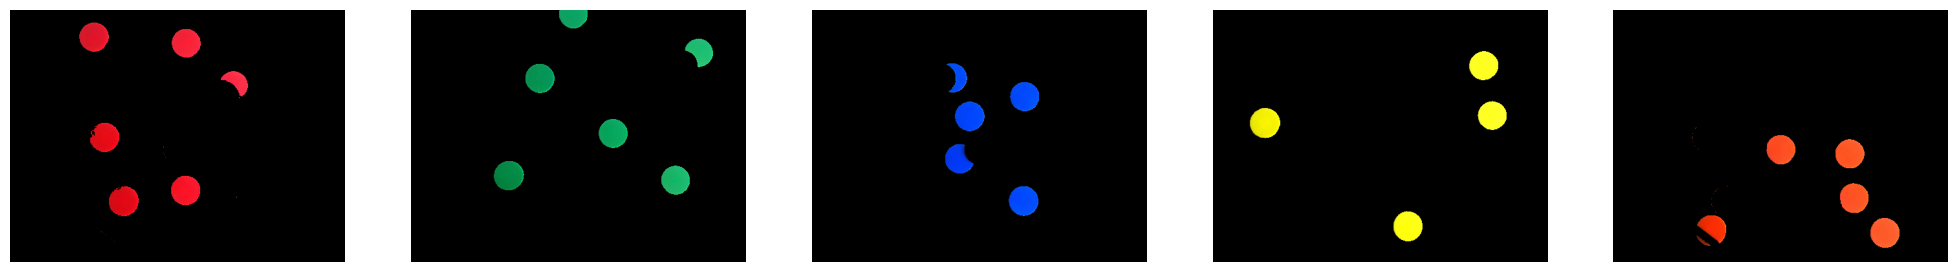

In [22]:
images10 = [masked_imgR, masked_imgG, masked_imgB, masked_imgY, masked_imgO]
plotImages(images10)